In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from scipy import *
from numpy import linalg as LA


In [91]:
def weighted_MDS_v1(distance,w):
    '''
    distance is array of size n by n
    weight is a vector of size (n,)  ( have to be integer)
    '''

    P_ = np.eye(len(w)) -np.ones((len(w),len(w)))*(w/np.sum(w))
    Weighted_Dc = -P_@ distance@P_.T/2
    '''
    mutiply each column by the weights
    '''
    d_ = np.zeros_like(Weighted_Dc)
    for i in range(len(w)):
        d_[:,i] = w[i]*Weighted_Dc[:,i]
    
    e_,v_ = LA.eig(d_)

    ii = np.argsort(np.abs(e_))[::-1]
    e_, v_= e_[ii],v_[:, ii]

    '''
    rescale by eigenvector by weights
    
    '''
    scaling_factor = np.zeros(e_.shape)
    for i in range(len(e_)):
        scaling_factor[i] = np.sqrt(np.sum(w*v_[:,i]**2))
    coords_ = np.sqrt(np.abs(e_))*v_/scaling_factor
    
    return coords_, e_,v_, Weighted_Dc

In [148]:
def MDS(distance):
    N = len(distance)
    P_ = np.eye(N) -np.ones([N, N])/N
    d = -P_@ distance@P_.T/2
    e_,v_ = LA.eigh(d)

    ii = np.argsort(np.abs(e_))[::-1]
    e_, v_= e_[ii],v_[:, ii]

    coords_ = np.sqrt(np.abs(e_))*v_
    
    return coords_, e_,v_, d

In [157]:
import scipy.sparse.linalg as sp
def weighted_MDS(w, weight):

    dmean = (w*weight).sum(1, keepdims=True)
    w = w-dmean
    w = w-(w*weight[:, None]).sum(0)
    w0 = -0.5*w


    w = w0 * weight[None, :] 
    ne = 7
    e, v = LA.eig(w)
#     ne = 7
#     e, v = sp.eigsh(w, ne, which='LM', return_eigenvectors=True)
    ii = np.argsort(np.abs(e))[::-1]
    e, v = e[ii], v[:, ii]

    scaling_factor = np.linalg.norm(v*np.sqrt(weight[:, None]), axis=0, keepdims=True)
    print(scaling_factor)
    xp = v*np.sqrt(np.abs(e)) / scaling_factor
    return xp, e, v, w0

In [158]:
x = np.random.randn(80, 10)
d = np.sqrt(((x[None, :] - x[None, :].transpose(1, 0, 2))**2).sum(-1))

In [159]:
# idxs = np.random.randint(0, len(x), 5)
# idxs = np.arange(len(x)-1)
# xr = np.vstack([x, x[idxs, :]])
xr = x[:-1, :]
dr = np.sqrt(((xr[None, :] - xr[None, :].transpose(1, 0, 2))**2).sum(-1))

In [160]:
w = np.ones(len(x))
w[-1] = 0
w /= w.sum()

In [161]:
coords_, e_,v_, Weighted_Dc = weighted_MDS(d,w)

[[0.11247567 0.11185759 0.1111606  0.11230925 0.11216467 0.11118867
  0.11183108 0.11102741 0.11242268 0.11241091 0.11247752 0.11249295
  0.11215761 0.11247147 0.11250756 0.11246535 0.11250863 0.11249408
  0.11246461 0.11245331 0.11249916 0.11245302 0.11228772 0.11246493
  0.11250271 0.11246756 0.11250667 0.11242527 0.11246593 0.11249881
  0.11250825 0.11246666 0.11249355 0.11238809 0.11214186 0.11250648
  0.11248466 0.11250809 0.11239411 0.11187507 0.11250352 0.11249799
  0.11231747 0.11249449 0.11249493 0.11249909 0.11249443 0.11245789
  0.11250573 0.11247241 0.11241637 0.11248491 0.11245022 0.11247357
  0.11244624 0.11250692 0.11249793 0.11249762 0.11248694 0.11227143
  0.11250864 0.11245196 0.11249908 0.11248748 0.11248327 0.112499
  0.11247181 0.11237936 0.11247919 0.11250821 0.11248274 0.11241608
  0.11250232 0.11250849 0.11250879 0.11250358 0.11247794 0.11248195
  0.03297464 0.        ]]


/tmp/ipykernel_22610/3295610977.py:20: RuntimeWarning: invalid value encountered in true_divide
  xp = v*np.sqrt(np.abs(e)) / scaling_factor


In [162]:
coords, e,v, d_ = MDS(dr)

In [163]:
print('repeated: ', coords[:, 0])
print('weighted: ', coords_[:, 0])

repeated:  [ 0.07422371  0.33105954 -0.77810582 -0.18569446  0.34369947 -0.36528827
 -0.13879128 -0.15623226 -0.13772374 -0.01823352 -0.08268612 -0.31603198
 -0.31980196  0.56247666  0.61982491  0.53592301  0.05568076 -0.20640226
  0.08131486 -0.58491053 -0.22283603 -0.09670943 -0.26774709  0.44299973
  0.2807453  -1.11717902  0.21527946  0.19027451  0.04742289  0.00858747
 -0.22396872 -0.27872578 -0.09579266  0.29305071 -0.62413262  0.2579048
  0.45701056  0.55094545 -0.17510612 -0.26551235 -0.30932416  0.08545501
  0.52172721 -0.5978463  -0.23387912 -0.34976009  1.14421254 -0.42408928
  0.29998216  0.72533591  0.64628964  0.15459572  0.30484675  0.45024071
  0.50144241  0.07059569  0.50971187 -0.27983766 -0.07390386  0.30691527
 -0.42342427  0.38925818 -0.79709419  0.19318251  0.63946028  0.37876831
 -0.27849311 -0.39054094 -0.68199323 -0.13097077  0.0133216   0.89723672
 -0.16401478 -0.12660494 -0.67069288  0.22316361 -0.87427949 -0.28771131
 -0.05209352]
weighted:  [ 0.07422371  0.

In [164]:
Weighted_Dc[-1:, :-1]@v[:, 0]/np.sqrt(e[0])

array([0.09274839])

In [49]:
coords_[-1:, :2]

array([[ 0.19373797, -0.11808463]])

In [28]:
coords, e, v, weighted_d = weighted_MDS_v1(distance, w)

<AxesSubplot:>

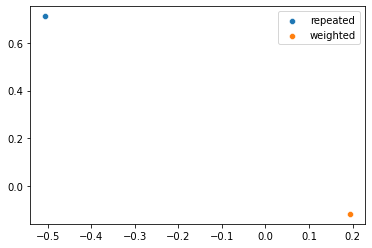

In [40]:
import seaborn as sns
sns.scatterplot(x=-coords[-1:, 0], y=-coords[-1:, 1], label='repeated')
# sns.scatterplot(x=coords_[-1:, 0], y=coords_[-1:, 1], label='weighted')

In [72]:
def Euclidean_dist(x1,x2):
    return np.sum((x1-x2)**2)

In [73]:
def repeat_pts(pts_x,pts_y,w):
    pts_x_r = []
    pts_y_r = []
    for x,y,w_ in zip(pts_x,pts_y,w):
        pts_x_r+=[x]*w_
        pts_y_r+=[y]*w_
    return pts_x_r,pts_y_r

Example

In [74]:
pts_x = np.array([0,0,1])
pts_y = np.array([0,1,0])
w= [1,1,2 ]
pts_xr,pts_yr=repeat_pts(pts_x,pts_y,w)

(-0.05, 1.05, -0.05, 1.05)

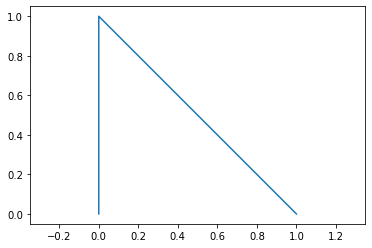

In [75]:
plt.plot(pts_x,pts_y)

plt.axis('equal')

usual MDS with repeated entries

In [76]:
N=len(pts_xr)
euclidean_dist = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        euclidean_dist[i,j] = (pts_xr[i]-pts_xr[j])**2+(pts_yr[i]-pts_yr[j])**2
        
P = np.eye(N) - np.ones((N,N))/N
D_full = -P@ euclidean_dist@P/2

e_full,v_full = LA.eig(D_full)
ii = np.argsort(np.abs(e_full))[::-1]
e_full, v_full = e_full[ii], v_full[:, ii]

coords_ =  np.sqrt(e_full)*v_full

Weighted MDS v2

In [77]:
N=len(pts_x)
euclidean_dist = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        euclidean_dist[i,j] = (pts_x[i]-pts_x[j])**2+(pts_y[i]-pts_y[j])**2
        
coords_m, e_m,v_m, dw = weighted_MDS_v1(euclidean_dist,w);

[1.12934949 1.01747204 1.15470054]


In [78]:
coords_m[:,0]/v_m[:,0]

array([1.04409419, 1.04409419, 1.04409419])

In [79]:
print('Eigenvalues='+str(e_m[:2]))

Eigenvalues=[1.3903882 0.3596118]


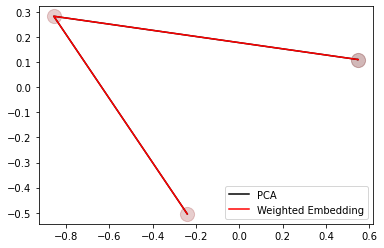

In [80]:
plt.scatter(coords_[:,0],coords_[:,1],200,'k',alpha=0.1)
plt.plot(coords_[:,0],coords_[:,1],'k',label='PCA')

plt.scatter(-coords_m[:,0],-coords_m[:,1],200,'r',alpha=0.1)
plt.plot(-coords_m[:,0],-coords_m[:,1],'r', label='Weighted Embedding')

plt.legend()
